Question 1

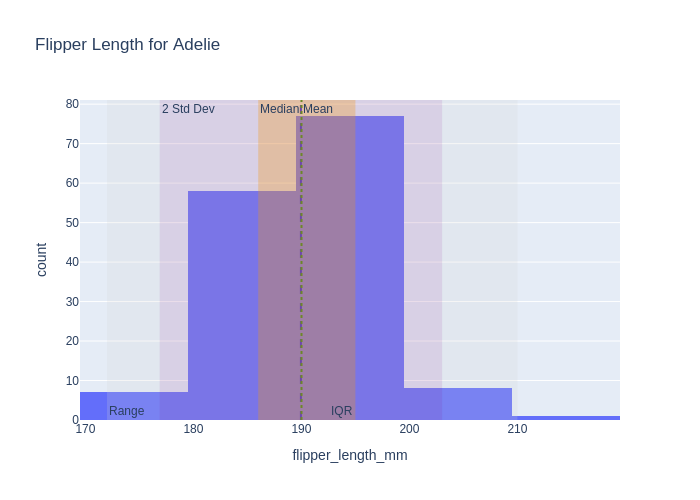

In [1]:
#https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import seaborn as sns
import pandas as pd
import plotly.express as px

import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
#data = {
#    "species": ["Adelie", "Adelie", "Adelie", "Chinstrap", "Chinstrap", "Gentoo", "Gentoo", "Adelie", "Chinstrap", "Gentoo"],
#    "flipper_length_mm": [181, 186, 195, 210, 205, 230, 225, 188, 215, 235]
#}

penguins_sample = pd.DataFrame(pingees)

# Define a function to create histograms with annotations for each species
def create_histogram_with_annotations(species_data, species_name):
    flipper_lengths = species_data["flipper_length_mm"]
    
    # Calculate statistical metrics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_range = [flipper_lengths.min(), flipper_lengths.max()]
    interquartile_range = [flipper_lengths.quantile(0.25), flipper_lengths.quantile(0.75)]
    std_dev_range = [mean - 2 * flipper_lengths.std(), mean + 2 * flipper_lengths.std()]
    
    # Create a histogram for the species
    fig = px.histogram(species_data, x="flipper_length_mm", nbins=5, title=f"Flipper Length for {species_name}")
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_dash="dash", line_color="blue", annotation_text="Mean", annotation_position="top right")
    fig.add_vline(x=median, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top left")
    
    # Add rectangles for range, interquartile range, and 2 std dev range
    fig.add_vrect(x0=flipper_range[0], x1=flipper_range[1], fillcolor="lightgray", opacity=0.2, line_width=0, annotation_text="Range", annotation_position="bottom left")
    fig.add_vrect(x0=interquartile_range[0], x1=interquartile_range[1], fillcolor="orange", opacity=0.3, line_width=0, annotation_text="IQR", annotation_position="bottom right")
    fig.add_vrect(x0=std_dev_range[0], x1=std_dev_range[1], fillcolor="purple", opacity=0.1, line_width=0, annotation_text="2 Std Dev", annotation_position="top left")
    
    return fig

# Create histograms for each species in the sample data
species_list = penguins_sample["species"].unique()
figures = {}

for species in species_list:
    species_data = penguins_sample[penguins_sample["species"] == species]
    figures[species] = create_histogram_with_annotations(species_data, species)

# Display the figures
figures['Adelie'].show(renderer="png")

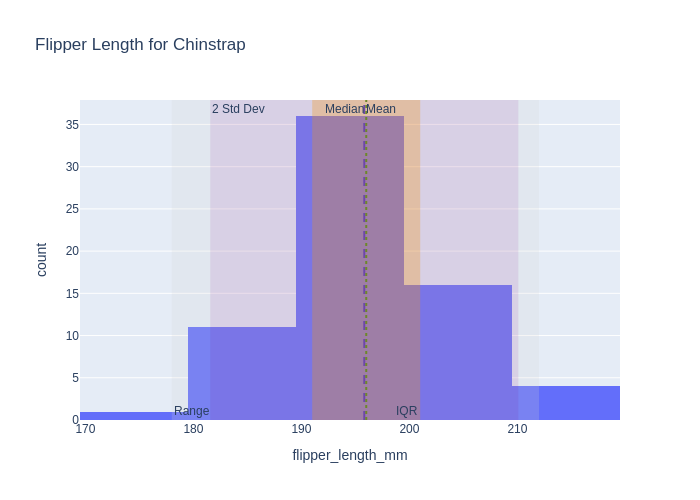

In [2]:
figures['Chinstrap'].show(renderer="png")

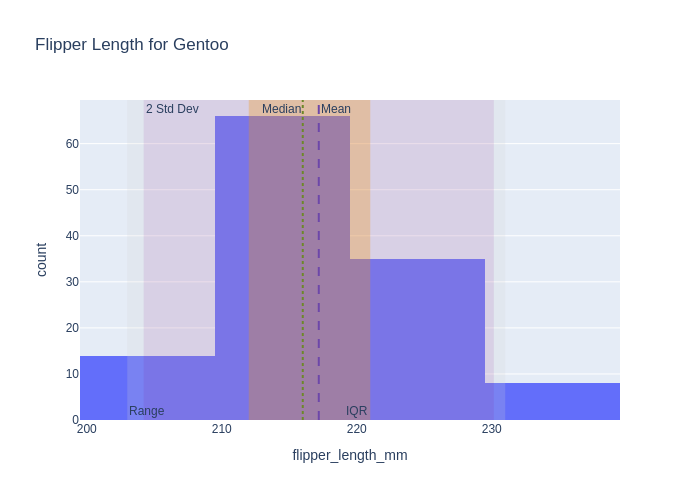

In [3]:
figures['Gentoo'].show(renderer="png")

Question 2

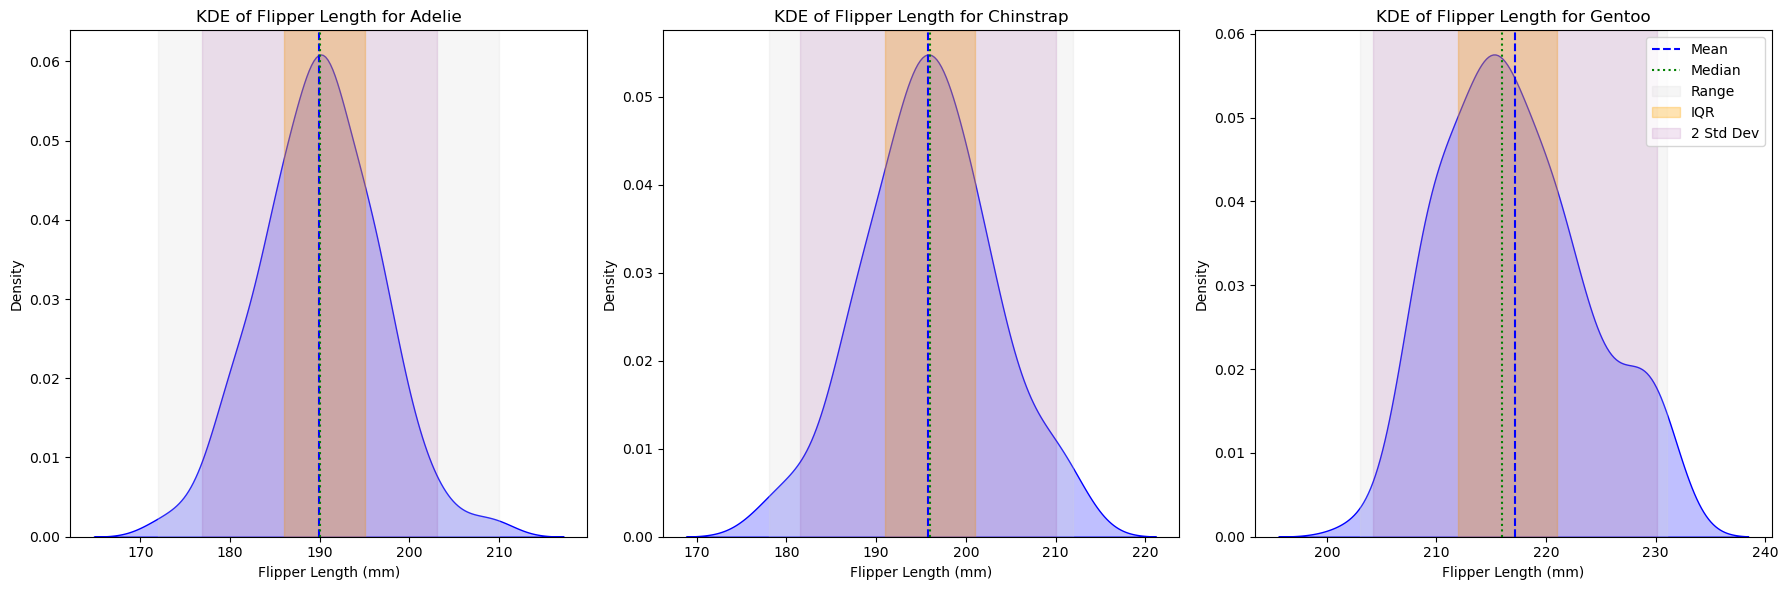

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Filter out rows with missing values for flipper_length_mm and species
penguins_filtered = penguins.dropna(subset=["flipper_length_mm", "species"])

# Define a function to create a KDE plot with annotations
def create_kde_plot_with_annotations(ax, species_data, species_name):
    flipper_lengths = species_data["flipper_length_mm"]
    
    # Calculate statistical metrics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_range = [flipper_lengths.min(), flipper_lengths.max()]
    interquartile_range = [flipper_lengths.quantile(0.25), flipper_lengths.quantile(0.75)]
    std_dev_range = [mean - 2 * flipper_lengths.std(), mean + 2 * flipper_lengths.std()]
    
    # Plot KDE
    sns.kdeplot(flipper_lengths, fill=True, ax=ax, color="blue")
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle=':', label='Median')
    
    # Add rectangles for range, IQR, and 2 standard deviations
    ax.axvspan(flipper_range[0], flipper_range[1], color='lightgray', alpha=0.2, label='Range')
    ax.axvspan(interquartile_range[0], interquartile_range[1], color='orange', alpha=0.3, label='IQR')
    ax.axvspan(std_dev_range[0], std_dev_range[1], color='purple', alpha=0.1, label='2 Std Dev')
    
    # Add labels and title
    ax.set_title(f"KDE of Flipper Length for {species_name}")
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Density")

# Create subplots for the KDE plots
species_list = penguins_filtered["species"].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Generate KDE plots for each species
for ax, species in zip(axes, species_list):
    species_data = penguins_filtered[penguins_filtered["species"] == species]
    create_kde_plot_with_annotations(ax, species_data, species)

# Add legend to the last plot
axes[-1].legend()

# Display the plots
plt.tight_layout()
fig.show()


Question 3

I personally prefer the KDE as it has a smooth representation of the proability density which can show data better than box plots or histograms, which are more blocky. This is especially advantageous when working with larger data sets. In contrast, box plots and histograms are more concise for smaller datasets, but I think that KDEs are more flexible. 

1. Box Plot
Purpose: Summarizes key distribution statistics (min, max, Q1, median, Q3) and highlights outliers.

Strengths:
Ideal for summarizing and comparing distributions across groups.
Shows important statistics and highlights potential outliers.

Weaknesses:
Lacks detail on the overall distribution shape.
Not suited for multimodal data (multiple peaks).

Best for: When you need to compare multiple groups' summary statistics side-by-side.

2. Histogram
Purpose: Displays the frequency distribution of numerical data using bars.

Strengths:
Easy to understand and visually intuitive.
Shows how data is spread across different value ranges.
Clearly highlights skewness and modality.

Weaknesses:
Sensitive to bin size, which can distort patterns.
Not as smooth as other methods, especially for small datasets.

Best for: Visualizing the frequency of data points in large datasets or showing the distribution’s general shape.

3. Kernel Density Estimator (KDE)
Purpose: Estimates the probability density function of data, providing a smooth curve that shows the distribution's likelihood.

Strengths:
Smooths out the data distribution without needing bins.
Shows a more accurate distribution of values compared to a histogram.
Excellent for visualizing the overall shape of large datasets.

Weaknesses:
Requires selecting a bandwidth (too small results in jagged lines, too large overly smooths the distribution).
Can be less intuitive for non-experts.
May obscure finer details due to smoothing.

Best for: When you want a continuous and smooth representation of the data distribution, especially in large datasets.


Question 4

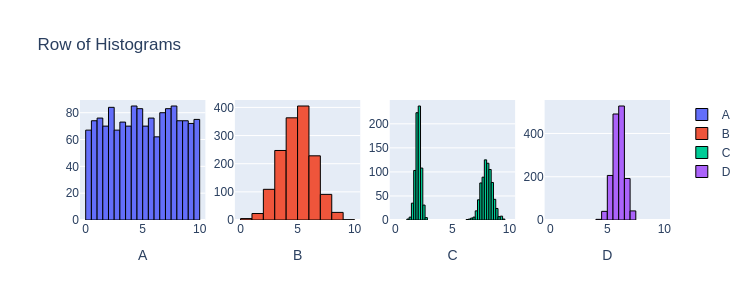

(A    5.039450
 B    4.957763
 C    5.008450
 D    5.995057
 dtype: float64,
 A    8.221179
 B    2.075296
 C    9.223261
 D    0.255247
 dtype: float64)

In [5]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Create a dataframe to easily calculate means and variances
df = pd.DataFrame({
    'A': data1,
    'B': data2,
    'C': data3,
    'D': data4
})

# Calculate means and variances for all datasets
means = df.mean()
variances = df.var()

# Display means and variances
means, variances



In [6]:
# Calculating means
mean_A = np.mean(df['A'])
mean_B = df['B'].mean()
mean_C = np.mean(df['C'])
mean_D = df['D'].mean()

# Calculating standard deviations using degrees of freedom = 1
std_A = np.std(df['A'], ddof=1)
std_B = df['B'].std(ddof=1)
std_C = np.std(df['C'], ddof=1)
std_D = df['D'].std(ddof=1)

# Displaying the means and standard deviations
means_and_stds = pd.DataFrame({
    'Dataset': ['A', 'B', 'C', 'D'],
    'Mean': [mean_A, mean_B, mean_C, mean_D],
    'Standard Deviation': [std_A, std_B, std_C, std_D]
})
means_and_stds

Dataset      Mean  Standard Deviation
0       A  5.039450            2.867260
1       B  4.957763            1.440589
2       C  5.008450            3.036982
3       D  5.995057            0.505220

Dataset A: Uniform distribution between 0 and 10.
Dataset B: Normal distribution with mean = 5 and standard deviation = 1.5.
Dataset C: Bimodal normal distribution, with one mode centered around 2 and the other around 8.
Dataset D: Normal distribution with mean = 6 and standard deviation = 0.5.

1. Similar means and similar variances:
Datasets: B and D
Mean: Both datasets are centered around the values 5-6 (i.e., similar means).
Variance: The spread (variance) of both distributions is similar. While B has a slightly higher variance than D, they are relatively close compared to the others.
2. Similar means but quite different variances:
Datasets: B and C
Mean: Both B and C have means around 5-6 for part of their distributions.
Variance: C has a much larger variance due to its bimodal nature (spread between 2 and 8), while B has a more compact normal distribution with a smaller variance.
3. Similar variances but quite different means:
Datasets: A and C
Variance: While A and C have similar variances (as A spans the range 0-10 uniformly, and C covers 2 and 8 with a large spread), the range of the values shows comparable variance.
Mean: A has a mean closer to 5, while C is bimodal, with peaks around 2 and 8, creating different mean values.
4. Quite different means and quite different variances:
Datasets: A and D
Mean: A is uniformly distributed from 0 to 10, with a mean around 5, while D is centered more tightly around 6.
Variance: A has a much larger variance due to its uniform distribution, while D is a tighter normal distribution with less spread.

Chatbot logs
Chatgpt was unable to export the logs due to the fact that I accidentally generated a DALLE image in the process of trying to solve the historgram problem. Chatgpt says: "Sharing conversations with DALLE images is not yet supported"

Summary of Interaction:

In this session, we explored several concepts in data visualization and statistical analysis. The discussion involved working with distributions of datasets and analyzing them using different plotting techniques in Python. Specifically, we worked with Seaborn's KDE plots and histograms generated using Plotly to visualize distributions and compare datasets.

Box Plot, Histogram, and KDE Comparison:

I provided descriptions and comparisons of three common visualization methods: Box Plots, Histograms, and Kernel Density Estimators (KDEs).
Each method's strengths and weaknesses were highlighted in terms of summarizing data, showing distribution shape, and visualizing spread, with real-world use cases and recommendations based on the dataset types.

Creating KDE Plots:

I assisted in generating KDE plots for different penguin species from the Seaborn Penguins dataset using sns.kdeplot and Matplotlib to visualize the distributions of flipper length.
The plots included annotations for mean, median, range, interquartile range (IQR), and the range defined by two standard deviations from the mean.

Analyzing Distributions Using Plotly:

We explored four datasets generated from different distributions (uniform, normal, and bimodal) using Plotly to create histograms for each dataset. These datasets had different characteristics (means and variances), and I assisted in calculating their summary statistics (means and variances).
Using these visualizations, we discussed which datasets had similar means and variances, similar means but different variances, similar variances but different means, and quite different means and variances.
This summary outlines the major concepts discussed and code applied in the session, as well as the statistical analyses conducted.



Question 5

Skewness describes how a distribution is lopsided.

For right-skewed distributions, the tail stretches out more on the right side as there are vhigher values there. This pulls the mean higher than the median since the mean gets dragged towards those larger numbers.

For left-skewed distributions, the tail is longer on the left, pulling the mean down, making it smaller than the median.

In conclusion, the mean is influenced by the tail and can end up being bigger or smaller than the median, depending on which way the distribution is skewed.

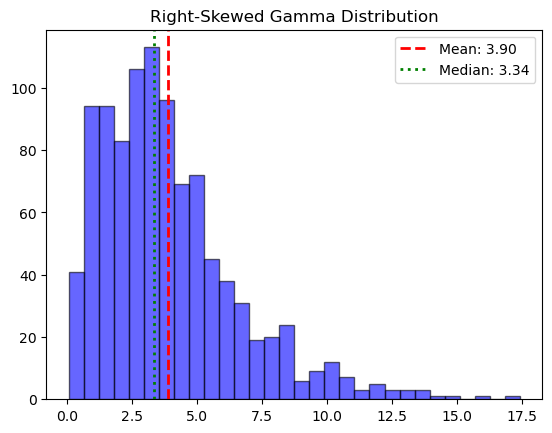

Mean of right-skewed sample1: 3.8977040346564737
Median of right-skewed sample1: 3.3390919347758827


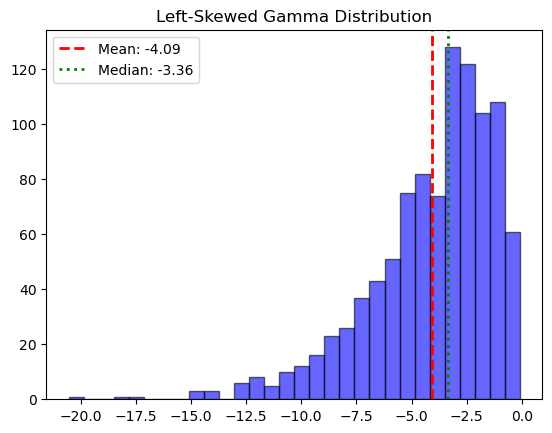

Mean of left-skewed sample2: -4.089644632489317
Median of left-skewed sample2: -3.36205472125115


In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

# Generate a right-skewed gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot the right-skewed distribution using matplotlib
plt.hist(sample1, bins=30, alpha=0.6, color='b', edgecolor='black')
plt.axvline(np.mean(sample1), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(sample1):.2f}')
plt.axvline(np.median(sample1), color='g', linestyle='dotted', linewidth=2, label=f'Median: {np.median(sample1):.2f}')
plt.title(f'Right-Skewed Gamma Distribution')
plt.legend()
plt.show()

# Mean and median of sample1
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])[0]

print(f"Mean of right-skewed sample1: {mean_sample1}")
print(f"Median of right-skewed sample1: {median_sample1}")

# Generate a left-skewed gamma distribution by negating the data
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Plot the left-skewed distribution using matplotlib
plt.hist(sample2, bins=30, alpha=0.6, color='b', edgecolor='black')
plt.axvline(np.mean(sample2), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(sample2):.2f}')
plt.axvline(np.median(sample2), color='g', linestyle='dotted', linewidth=2, label=f'Median: {np.median(sample2):.2f}')
plt.title(f'Left-Skewed Gamma Distribution')
plt.legend()
plt.show()

# Mean and median of sample2
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])[0]

print(f"Mean of left-skewed sample2: {mean_sample2}")
print(f"Median of left-skewed sample2: {median_sample2}")


As we can see the mean of sample1 is larger than the median, as the histogram has a distribution with longer tail on the right.
The opposite is true for sample2: the mean is smaller than the median, as the histogram has a distribution with longer tail on the left.

Question 6

In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

restaurant id  category id  item id  serving size (oz)  calories  \
0             1000          100        0                4.8       300   
1             1000          100        1                4.8       250   
2             1000          100        2                3.9       370   
3             1000          100        3                5.7       450   
4             1000          100        4                5.7       400   
..             ...          ...      ...                ...       ...   
745           3000          130      745                NaN       180   
746           3000          130      746                NaN       190   
747           3000          100      747                NaN       340   
748           3000          100      748                NaN        90   
749           3000          100      749                NaN        90   

     calories from fat total fat (g)  total fat (% daily value)  \
0                120.0          13.0                       20.0   
1                 70.0           8.0                       12.0   
2                200.0          23.0                       35.0   
3                250.0          28.0                       43.0   
4                210.0          23.0                       35.0   
..                 ...           ...                        ...   
745                NaN          14.0                        NaN   
746                NaN          18.0                        NaN   
747                NaN          13.0                        NaN   
748                NaN           8.0                        NaN   
749                NaN           0.0                        NaN   

     saturated fat (g)  saturated fat (% daily value)  ...  carbohydrates (g)  \
0                  5.0                           25.0  ...                 31   
1                  3.0                           15.0  ...                 30   
2                  8.0                           42.0  ...                 29   
3                 10.0                           52.0  ...                 30   
4                  8.0                           42.0  ...                 30   
..                 ...                            ...  ...                ...   
745                NaN                            NaN  ...                 12   
746                NaN                            NaN  ...                  6   
747                NaN                            NaN  ...                 38   
748                NaN                            NaN  ...                  5   
749                NaN                            NaN  ...                 24   

     carbohydrates (% daily value)  dietary fiber (g)  \
0                             10.0                  4   
1                             10.0                  4   
2                             10.0                  4   
3                             10.0                  4   
4                             10.0                  4   
..                             ...                ...   
745                            NaN                  3   
746                            NaN                  3   
747                            NaN                  0   
748                            NaN                  4   
749                            NaN                  4   

     dietary fiber (% daily value)  sugars (g)  protein (g)  \
0                             17.0         3.0         17.0   
1                             17.0         3.0         18.0   
2                             17.0         2.0         14.0   
3                             17.0         2.0         21.0   
4                             17.0         2.0         21.0   
..                             ...         ...          ...   
745                            NaN         NaN          4.0   
746                            NaN         NaN          7.0   
747                            NaN         NaN         18.0   
748                            NaN 

In [9]:
df.describe()

restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199           4.972504   
min             0.000000                   0.000000           0.000000   
25%            20.000000                   3.750000           0.000000   
50%           100.000000                  17.000000           0.200000   
75%           200.000000                  35.000000           6.000000   
max          1060.000000                 182.000000          30.000000   

       saturated fat (% daily value)  trans fat (g)  ...  carbohydrates (g)  \
count                     260.000000     637.000000  ...         750.000000   
mean                       29.965385       0.603297  ...          69.574667   
std                        26.639209       1.193182  ...          65.719590   
min                         0.000000       0.000000  ...           0.000000   
25%                         4.750000       0.000000  ...          30.000000   
50%                        24.000000       0.000000  ...          48.000000   
75%                        48.000000       0.500000  ...          85.750000   
max                       102.000000       9.000000  ...         340.000000   

       carbohydrates (% daily value)  dietary fiber (g)  \
count                     260.000000         750.000000   
mean                       15.780769           1.717333   
std                         9.419544           2.075374   
min                         0.000000           0.000000   
25%                        10.000000           0.000000   
50%                        15.000000           1.000000   
75%                        20.000000           3.000000   
max                        47.000000          21.000000   

       dietary fiber (% daily value)  sugars (g)  protein (g)  \
count                     260.000000  637.000000   750.000000   
mean                        6.530769   25.718995    11.398400   
std                         6.307057   24.530455    11.119111   
min                         0.000000    0.000000     0.000000   
25%                         0.000000    5.000000     3.000000   
50%                         5.000000   18.000000     9.000000   
75%                        10.000000   41.000000    16.000000   
max                        28.000000  128.000000   118.000000   

       vitamin a (% daily value)  vitamin c (% daily value)  \
count                 637.000000                 637.000000   
mean                   13.430141                   7.954474   
std                    20.250714                  21.220825   
min                     0.000000                   0.000000   
25%                     4.000000                   0.000000   
50%                     8.000000                   0.000000   
75%                    15.000000                   6.000000   
max                   170.000000                 240.000000   

       calcium (% daily value)  iron (% daily value)  
count               637.000000            637.000000  
mean                 17.725275              8.819466  
std                  15.739473             10.229923  
m

In [10]:
# Missing values
# Step 1: Identify missing values in each column
missing_values = df.isnull().sum()

# Step 2: Calculate the proportion of missing values in each column
missing_proportion = (df.isnull().sum() / len(df)) * 100

# Combine the count and proportion of missing values into a single DataFrame
missing_data_analysis = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage of Missing Values': missing_proportion
})

missing_data_analysis
# can see that there is a lot of missing data, have to consider not using them

Missing Values  Percentage of Missing Values
restaurant id                               0                      0.000000
category id                                 0                      0.000000
item id                                     0                      0.000000
serving size (oz)                         355                     47.333333
calories                                    0                      0.000000
calories from fat                         490                     65.333333
total fat (g)                               0                      0.000000
total fat (% daily value)                 490                     65.333333
saturated fat (g)                         113                     15.066667
saturated fat (% daily value)             490                     65.333333
trans fat (g)                             113                     15.066667
cholesterol (mg)                          113                     15.066667
cholesterol (% daily value)               490                     65.333333
sodium (mg)                               113                     15.066667
sodium (% daily value)                    490                     65.333333
carbohydrates (g)                           0                      0.000000
carbohydrates (% daily value)             490                     65.333333
dietary fiber (g)                           0                      0.000000
dietary fiber (% daily value)             490                     65.333333
sugars (g)                                113                     15.066667
protein (g)                                 0                      0.000000
vitamin a (% daily value)                 113                     15.066667
vitamin c (% daily value)                 113                     15.066667
calcium (% daily value)                   113                     15.066667
iron (% daily value)                      113                     15.066667

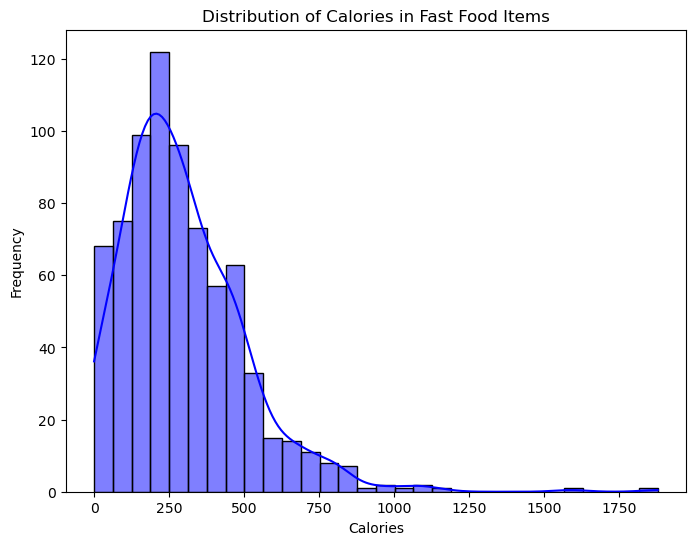

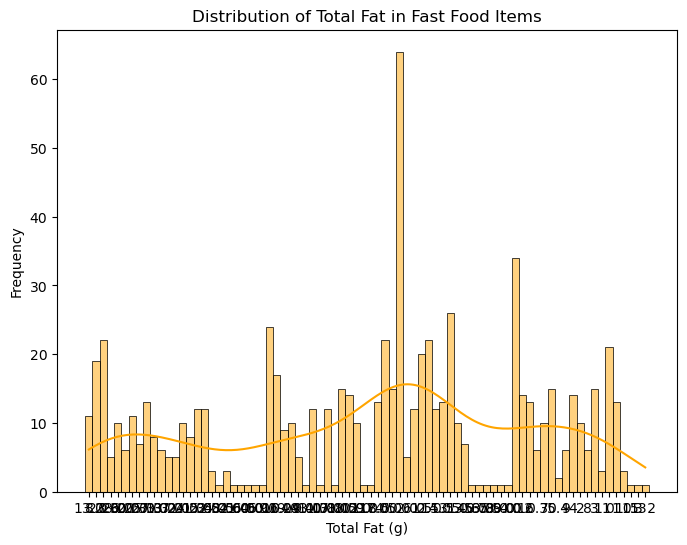

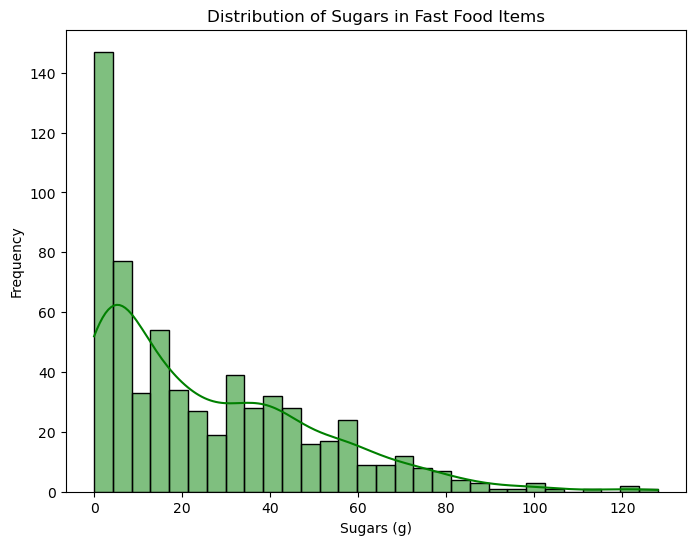

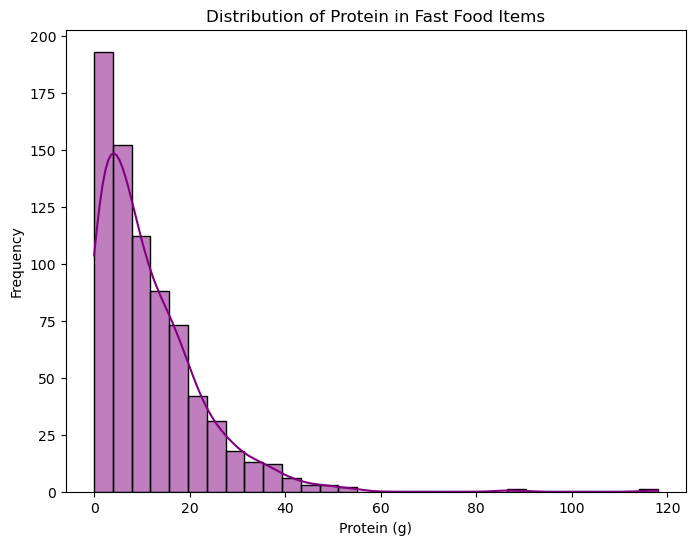

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of Calories
plt.figure(figsize=(8,6))
sns.histplot(df['calories'], bins=30, kde=True, color='blue')
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Distribution of Total Fat
plt.figure(figsize=(8,6))
sns.histplot(df['total fat (g)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Fat in Fast Food Items')
plt.xlabel('Total Fat (g)')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Distribution of Sugars
plt.figure(figsize=(8,6))
sns.histplot(df['sugars (g)'], bins=30, kde=True, color='green')
plt.title('Distribution of Sugars in Fast Food Items')
plt.xlabel('Sugars (g)')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Distribution of Protein
plt.figure(figsize=(8,6))
sns.histplot(df['protein (g)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Protein in Fast Food Items')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')
plt.show()

Calories: The distribution shows a wide range of caloric content, with a concentration around 150-300 calories, but there are items with significantly higher values.

Total Fat: The fat content follows a right-skewed distribution, with most items having relatively low fat content, but a few have very high fat content.

Sugars: The sugar content also shows a right-skewed distribution, where most items have moderate amounts of sugar, but some have very high sugar content.

Protein: The protein distribution is concentrated toward the lower end, indicating that a majority of fast food items contain relatively low amounts of protein.

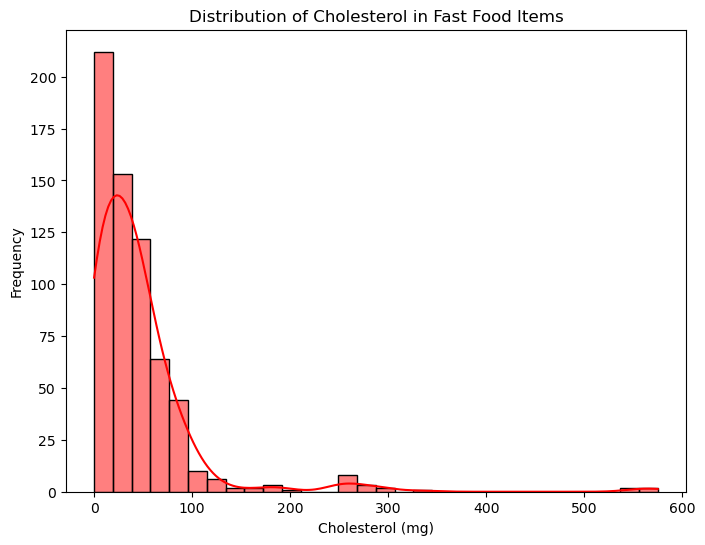

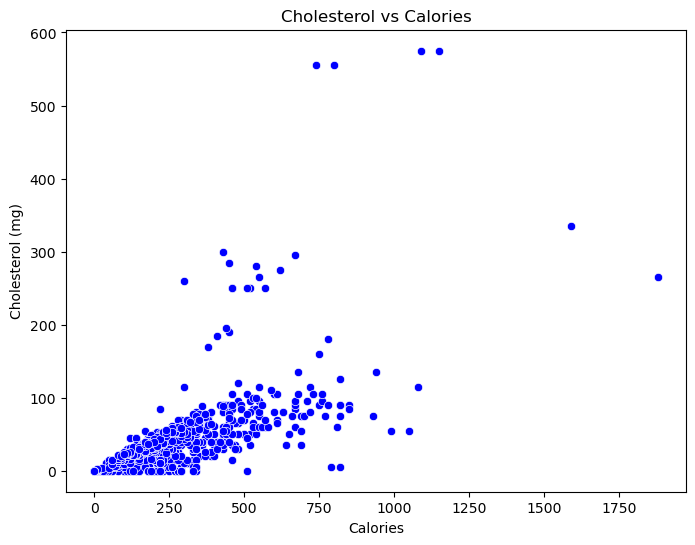

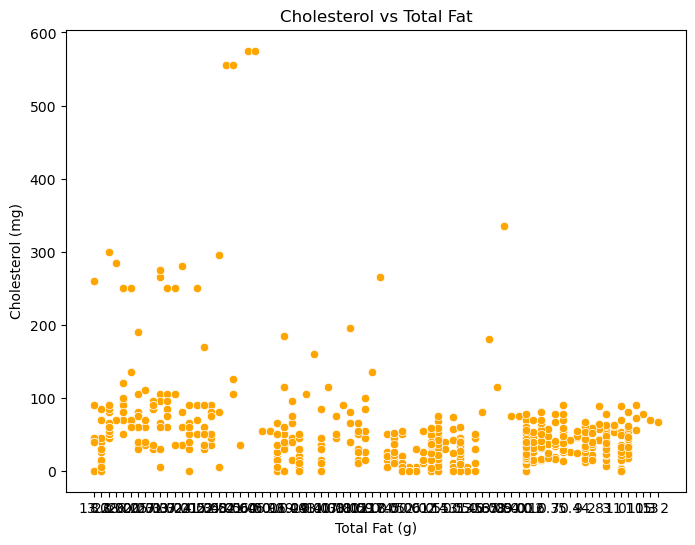

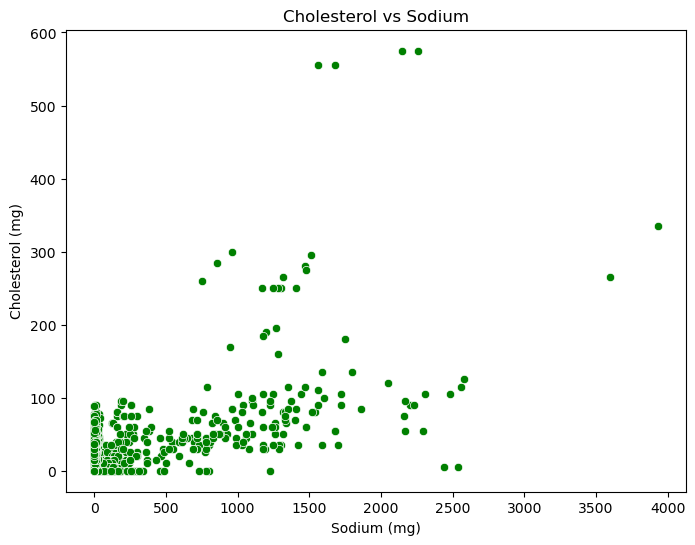

count    637.000000
mean      44.952904
std       62.509177
min        0.000000
25%       14.000000
50%       34.000000
75%       55.000000
max      575.000000
Name: cholesterol (mg), dtype: float64

In [12]:
# Plot 1: Distribution of Cholesterol Content
plt.figure(figsize=(8,6))
sns.histplot(df['cholesterol (mg)'], bins=30, kde=True, color='red')
plt.title('Distribution of Cholesterol in Fast Food Items')
plt.xlabel('Cholesterol (mg)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Correlation between Cholesterol and Calories
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['calories'], y=df['cholesterol (mg)'], color='blue')
plt.title('Cholesterol vs Calories')
plt.xlabel('Calories')
plt.ylabel('Cholesterol (mg)')
plt.show()

# Plot 3: Correlation between Cholesterol and Total Fat
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['total fat (g)'], y=df['cholesterol (mg)'], color='orange')
plt.title('Cholesterol vs Total Fat')
plt.xlabel('Total Fat (g)')
plt.ylabel('Cholesterol (mg)')
plt.show()

# Plot 4: Correlation between Cholesterol and Sodium
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['sodium (mg)'], y=df['cholesterol (mg)'], color='green')
plt.title('Cholesterol vs Sodium')
plt.xlabel('Sodium (mg)')
plt.ylabel('Cholesterol (mg)')
plt.show()

# Summary statistics for Cholesterol
cholesterol_summary = df['cholesterol (mg)'].describe()
cholesterol_summary

Distribution of Cholesterol:

The distribution is right-skewed, meaning that most fast food items have relatively low cholesterol content (concentrated around 0 to 50 mg), but there are a few items with very high cholesterol values (up to 575 mg).
Cholesterol vs. Calories:

There is a slight positive correlation between calories and cholesterol, but it is not strong. Some high-calorie items have low cholesterol, and vice versa.
Cholesterol vs. Total Fat:

There appears to be a positive correlation between cholesterol and total fat content. As total fat increases, the cholesterol content generally increases as well.
Cholesterol vs. Sodium:

A slight positive correlation can be observed between cholesterol and sodium, meaning items higher in cholesterol also tend to have higher sodium levels.
Summary Statistics:

The average cholesterol content is about 45 mg, with a standard deviation of 62.5 mg.
The minimum cholesterol value is 0 mg, and the maximum is 575 mg.
The median cholesterol value is 34 mg, which suggests that half the items have less than 34 mg of cholesterol.

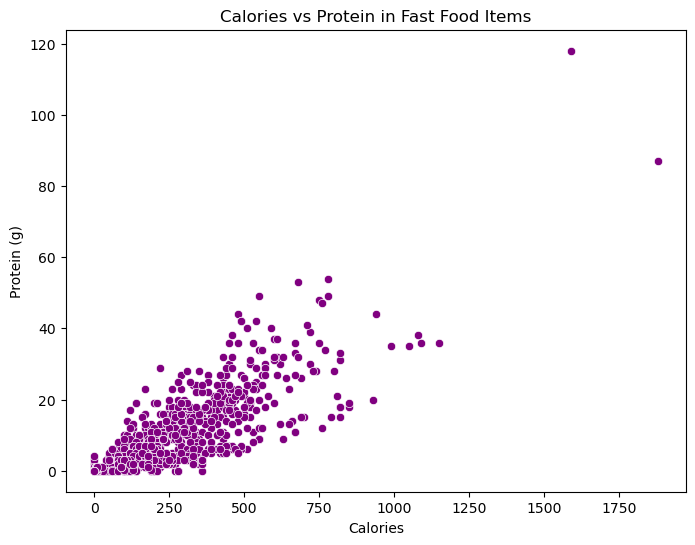

0.776696942539916

In [13]:
# Scatter plot to visualize the relationship between calories and protein
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['calories'], y=df['protein (g)'], color='purple')
plt.title('Calories vs Protein in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Protein (g)')
plt.show()

# Calculate the correlation coefficient between calories and protein
calories_protein_corr = df['calories'].corr(df['protein (g)'])
calories_protein_corr

Positive correlation between calories and protein, with coefficient of 0.78, strong correlation. Higher calorie foods have more protein. 

In [14]:
# Summary statistics for key health indicators
health_indicators = df[['calories', 'total fat (g)', 'saturated fat (g)', 
                        'cholesterol (mg)', 'sodium (mg)', 'sugars (g)', 'protein (g)']].describe()

health_indicators


calories  saturated fat (g)  cholesterol (mg)  sodium (mg)  \
count   750.000000         637.000000        637.000000    637.00000   
mean    296.149333           3.409105         44.952904    361.55416   
std     209.034366           4.972504         62.509177    580.64465   
min       0.000000           0.000000          0.000000      0.00000   
25%     150.000000           0.000000         14.000000      5.00000   
50%     260.000000           0.200000         34.000000     80.00000   
75%     410.000000           6.000000         55.000000    480.00000   
max    1880.000000          30.000000        575.000000   3930.00000   

       sugars (g)  protein (g)  
count  637.000000   750.000000  
mean    25.718995    11.398400  
std     24.530455    11.119111  
min      0.000000     0.000000  
25%      5.000000     3.000000  
50%     18.000000     9.000000  
75%     41.000000    16.000000  
max    128.000000   118.000000

Calories: Average of 296 kcal, with some items containing much higher values. This is a moderate amount of calories, with bench mark of humans needing 2000 kcal a day. There is significant range from 0 to 1070 kcal. 
Saturated Fat: Average of 3.41 grams, but some items have very high levels. Some items contain much more saturated fat, with max of 30g, which is bad for the heart. 
Cholesterol: Average of 45 mg, with extreme values as high as 575 mg. Recommended daily intake is around 300mg, this would have a negative effect on cardiovascular health.
Sodium: Average of 361 mg, though some items exceed 2000 mg. This is concerning, seeing as 2000mg of sodium is the recommended daily intake.
Sugars: Average of 25.72 grams, with high variability. 
Protein: Average of 11.4 grams, indicating that many items contain a moderate amount of protein. Higeher protein is good for maintaining of muscles, which helps with health.

Question 7

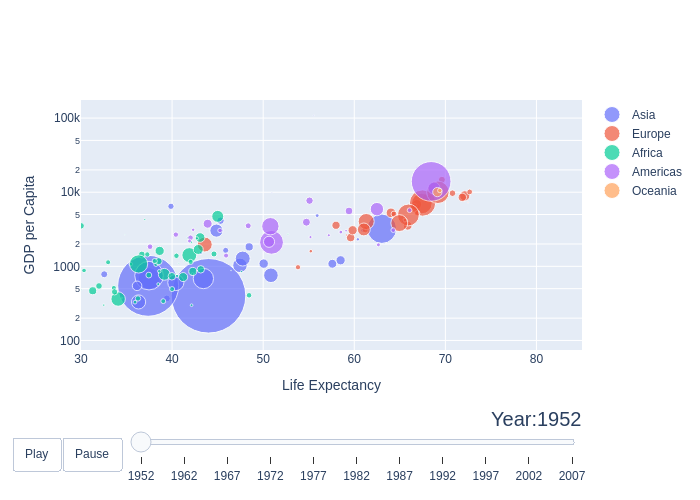

In [17]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show(renderer="png")


Question 8

Not sure how to do this one, kept on getting errors in the code, I couldn't figure out the source of the error.

Question 9 
Yes

Chatbot logs

https://chatgpt.com/share/66f5dac1-ebe4-800c-a33e-f0a627958df7

Here’s a comprehensive summary of our entire interaction for your assignment, covering all the topics we discussed:

Comprehensive Summary of Interaction

1. Skewness and Statistical Concepts:
We began by exploring the relationship between the mean, median, and skewness (right and left skewness). Through the use of Python code, we demonstrated the following key concepts:

Right skewness: When the mean is greater than the median due to a long right tail.
Left skewness: When the median is greater than the mean due to a long left tail.
We extended the code using the gamma distribution to simulate both right-skewed and left-skewed datasets, visualizing the distribution and comparing the mean and median.

2. Analysis of Fast Food Nutritional Data:
We loaded a dataset containing the nutritional values of various fast food items and explored its columns to understand the structure.
Summary Statistics were generated for key nutritional components like calories, saturated fat, cholesterol, sodium, sugars, and protein. These metrics helped in identifying trends and variations in the dataset.
Using visualizations, we analyzed distributions of nutrients such as:
Calories: A wide range, with most items between 150-500 calories.
Fat and Sugars: Right-skewed distributions, indicating many items with low values and a few with very high values.
Cholesterol: Displayed a strong positive skew, with some items having very high cholesterol content.

3. Relationship Between Calories and Protein:
We explored the relationship between calories and protein using a scatter plot and computed the correlation coefficient. The correlation was found to be 0.78, indicating a strong positive relationship: items with more calories tend to have more protein.

4. Sugar Skewness Analysis:
We analyzed the distribution of sugar in fast food items and found that the distribution was right-skewed (positive skewness of 1.10), meaning that while most items have low sugar content, some have much higher amounts.

5. Health Score Calculation:
We developed a health score for each fast food item by considering the following nutritional values:

Calories, saturated fat, cholesterol, sodium, sugars (negative factors).
Protein (positive factor).
The values were normalized, and weights were assigned to compute a final score. The health score was added to the dataset to rank the items based on their nutritional healthiness.
6. Analysis of Missing Values:
We identified and analyzed missing values in the dataset:

The serving size (oz) column had 47% missing values.
We discussed strategies for handling missing data, such as filling missing values or removing rows.
7. Technical Code Execution:
Throughout the interaction, we utilized various Python techniques and libraries, such as:

pandas for data manipulation and exploration.
matplotlib and seaborn for data visualization.
scipy.stats and numpy for statistical analysis.
sklearn.preprocessing for normalizing data.
Conclusions:
We successfully analyzed and visualized key nutritional indicators for fast food items.
A health score was developed to assess the overall healthiness of each item.
We also performed statistical exploration on skewness and the relationship between mean and median, extending into real-world applications with nutritional data.